In [150]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
df = pd.read_csv('credit_scoring.csv')

In [152]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
0,0,0.221813,43.0,0,0.527888,3280.0,7,0,0,2.0,A,c
1,0,0.602794,25.0,0,0.065868,333.0,2,0,0,0.0,A,b
2,1,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,A,c
3,0,0.075427,32.0,0,0.085512,7916.0,6,0,0,0.0,A,b
4,0,0.046560,58.0,0,0.241622,2416.0,9,0,0,0.0,A,d


In [153]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                     14845
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
RealEstateLoansOrLines                      0
GroupAge                                    0
dtype: int64

In [154]:
df = df.fillna(df.median(numeric_only=True))

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    150000 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

In [156]:
print('значения RealEstateLoansOrLines', df['RealEstateLoansOrLines'].unique())
print('значения GroupAge', df['GroupAge'].unique())

значения RealEstateLoansOrLines ['A' 'B' 'C' 'E' 'D']
значения GroupAge ['c' 'b' 'd' 'e' 'a']


In [157]:
le = LabelEncoder()
df['GroupAge'] = le.fit_transform(df['GroupAge'])
df['RealEstateLoansOrLines'] = le.fit_transform(df['RealEstateLoansOrLines'])

In [158]:
print('значения RealEstateLoansOrLines', df['RealEstateLoansOrLines'].unique())
print('значения GroupAge', df['GroupAge'].unique())

значения RealEstateLoansOrLines [0 1 2 4 3]
значения GroupAge [2 1 3 4 0]


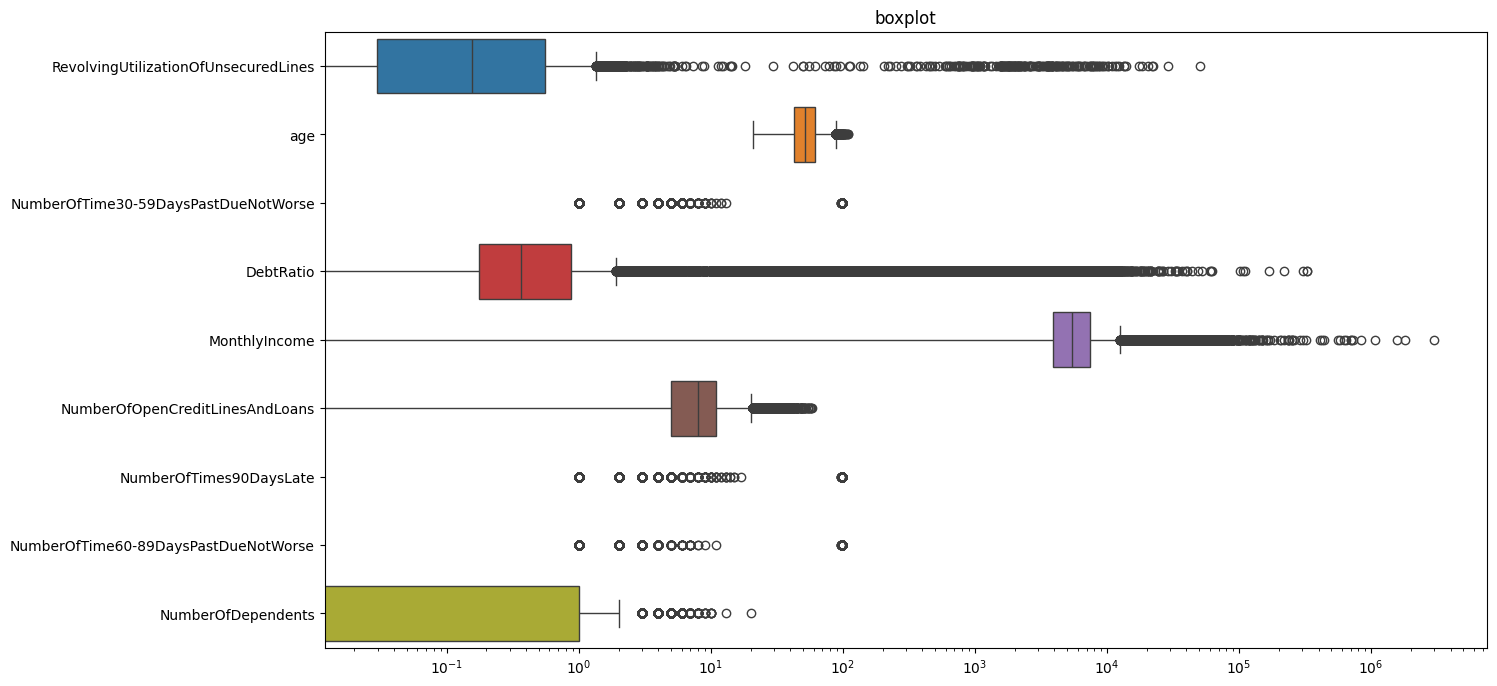

In [159]:
exclude_columns = ['SeriousDlqin2yrs', 'RealEstateLoansOrLines', 'GroupAge']
cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in exclude_columns]
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[cols], orient='h')
plt.title('boxplot')
plt.xscale('log') 
plt.show()

In [160]:
exclude_columns = ['SeriousDlqin2yrs', 'RealEstateLoansOrLines', 'GroupAge']
cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in exclude_columns]
outliers_mask = np.abs(stats.zscore(df[cols])) > 3
df = df[~outliers_mask.any(axis=1)]

In [161]:
print((df['SeriousDlqin2yrs'] == 1).sum())

9567


In [162]:
print((df['NumberOfTime30-59DaysPastDueNotWorse'] > 0).sum())
print((df['NumberOfTime60-89DaysPastDueNotWorse'] > 0).sum())
print((df['NumberOfTimes90DaysLate'] > 0).sum())

22880
7136
7906


In [163]:
df['NumberOfTime30-89DaysPastDueNotWorse'] = df['NumberOfTime30-59DaysPastDueNotWorse'] + df['NumberOfTime60-89DaysPastDueNotWorse']

In [164]:
df = df.drop(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse'], axis=1)

In [165]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfDependents,RealEstateLoansOrLines,GroupAge,NumberOfTime30-89DaysPastDueNotWorse
count,145619.000000,145619.000000,145619.000000,145619.000000,145619.000000,145619.000000,145619.000000,145619.000000,145619.000000,145619.000000,145619.000000
mean,0.065699,0.422978,52.225705,301.006466,6116.557942,8.199658,0.090400,0.707312,0.068906,2.769927,0.308167
std,0.247756,7.146410,14.039512,874.474351,4016.202876,4.631411,0.474761,1.040185,0.283293,0.992752,0.853366
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.029433,42.000000,0.174503,3868.000000,5.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,0.151558,52.000000,0.364763,5400.000000,8.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,0.000000,0.555563,62.000000,0.856955,7296.000000,11.000000,0.000000,1.000000,0.000000,4.000000,0.000000
max,1.000000,747.000000,94.000000,6466.000000,45000.000000,23.000000,12.000000,4.000000,3.000000,4.000000,15.000000


In [166]:
df.loc[df['NumberOfTimes90DaysLate'] > 0, 'NumberOfTimes90DaysLate'] = 1
df.loc[df['NumberOfTime30-89DaysPastDueNotWorse'] > 0, 'NumberOfTime30-89DaysPastDueNotWorse'] = 1

In [167]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfDependents,RealEstateLoansOrLines,GroupAge,NumberOfTime30-89DaysPastDueNotWorse
count,145619.000000,145619.000000,145619.000000,145619.000000,145619.000000,145619.000000,145619.000000,145619.000000,145619.000000,145619.000000,145619.000000
mean,0.065699,0.422978,52.225705,301.006466,6116.557942,8.199658,0.054292,0.707312,0.068906,2.769927,0.178576
std,0.247756,7.146410,14.039512,874.474351,4016.202876,4.631411,0.226594,1.040185,0.283293,0.992752,0.382998
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.029433,42.000000,0.174503,3868.000000,5.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,0.151558,52.000000,0.364763,5400.000000,8.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,0.000000,0.555563,62.000000,0.856955,7296.000000,11.000000,0.000000,1.000000,0.000000,4.000000,0.000000
max,1.000000,747.000000,94.000000,6466.000000,45000.000000,23.000000,1.000000,4.000000,3.000000,4.000000,1.000000


In [168]:
df.to_csv('cleaned_df.csv', index=False)